
# UANL - FACULTAD DE CIENCIAS FÍSICO MATEMÁTICAS

## Mineria de Datos


### Precios de acción de Microsoft

#### Introducción: Decidí elaborar un analisis sobre el precio de las acciones de Microsoft ya que este tipo de resgistros son 'sencillos' de conseguir, por así decirlo, el csv que se ve en el repositorio (Mineria-de-datos) es un registro que se descargo directamente de la página de yahoo-finanzas como CSV, son los precios de la acción de Microsoft en el periodo de abril 2020 - abril 2021. El analisis para este tipo de registros nos da una ligera introducción a lo que son los principios de analisis tecnico de un activo en materia de portafolios de inversión, una rama muy recurrida en el campo de las Ciencias Actuariales.

### Librerias Utilizadas

In [52]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

## DATA ACQUISITION

In [25]:
df = pd.read_csv("C:\\Users\\familia\\Documents\\MSFT.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-01,153.000000,157.750000,150.820007,152.110001,150.579803,57969900
1,2020-04-02,151.860001,155.479996,150.360001,155.259995,153.698120,49630700
2,2020-04-03,155.100006,157.380005,152.190002,153.830002,152.282501,41243300
3,2020-04-06,160.320007,166.500000,157.580002,165.270004,163.607422,67111700
4,2020-04-07,169.589996,170.000000,163.259995,163.490005,161.845322,62769000
...,...,...,...,...,...,...,...
248,2021-03-26,231.550003,236.710007,231.550003,236.479996,236.479996,25471700
249,2021-03-29,236.589996,236.800003,231.880005,235.240005,235.240005,25227500
250,2021-03-30,233.529999,233.850006,231.100006,231.850006,231.850006,24792000
251,2021-03-31,232.910004,239.100006,232.389999,235.770004,235.770004,43564500


## DATA CLEANING

In [26]:
#El dataFrame original esta lleno
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [27]:
df1=df.drop(columns=['High','Low','Close','Volume'])
df1

,Date,Open,Adj Close
0,2020-04-01,153.000000,150.579803
1,2020-04-02,151.860001,153.698120
2,2020-04-03,155.100006,152.282501
3,2020-04-06,160.320007,163.607422
4,2020-04-07,169.589996,161.845322
...,...,...,...
248,2021-03-26,231.550003,236.479996
249,2021-03-29,236.589996,235.240005
250,2021-03-30,233.529999,231.850006
251,2021-03-31,232.910004,235.770004


## DATA PARSING

In [28]:
df1.shape

(253, 3)

In [29]:
df1.columns

Index(['Date', 'Open', 'Adj Close'], dtype='object')

In [30]:
df1.dtypes

Date          object
Open         float64
Adj Close    float64
dtype: object

## DESCRIPTIVE STATISTICS

In [31]:
df1.describe()

,Open,Adj Close
count,253.000000,253.000000
mean,209.535652,208.641560
std,20.097125,20.539845
min,151.860001,150.579803
25%,200.050003,199.829971
50%,212.339996,211.384949
75%,222.690002,221.908905
max,245.029999,244.427048


## DATA VISUALIZATION

### Grafico de lineas

<AxesSubplot:>

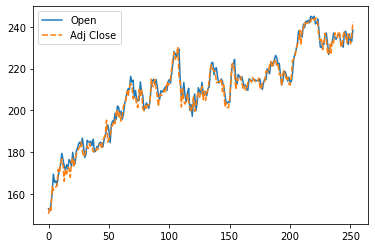

In [32]:
sns.lineplot(data=df1)

### Garfico de dispersión

<AxesSubplot:xlabel='Open', ylabel='Adj Close'>

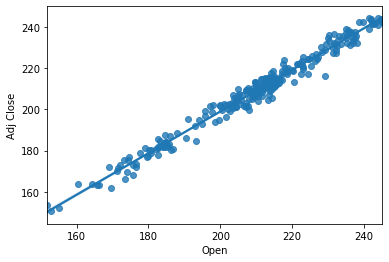

In [33]:
sns.regplot(x=df1['Open'],y=df1['Adj Close'])

## STATISTIC TEST

### ANOVA TEST

In [34]:
import scipy.stats as stats

In [35]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df1['Open'], df1['Adj Close'])
print(fvalue, pvalue)

0.24491811274365768 0.6208920104533517


In [36]:
#como el p valor es mayor que 0..05 no se rechaza

### SHAPIRO WILK TEST

In [37]:
df2=df.drop(columns=['Date','Open','High','Low','Close','Volume'])
df2

,Adj Close
0,150.579803
1,153.698120
2,152.282501
3,163.607422
4,161.845322
...,...
248,236.479996
249,235.240005
250,231.850006
251,235.770004


In [38]:
stats.shapiro(df2)

ShapiroResult(statistic=0.9652826189994812, pvalue=8.24137623567367e-06)

In [39]:
#Adj Close price is Normal

## LINEAR REGRESSION


In [40]:
df2=df.drop(columns=['Date','High','Low','Close','Volume'])
df2

,Open,Adj Close
0,153.000000,150.579803
1,151.860001,153.698120
2,155.100006,152.282501
3,160.320007,163.607422
4,169.589996,161.845322
...,...,...
248,231.550003,236.479996
249,236.589996,235.240005
250,233.529999,231.850006
251,232.910004,235.770004


In [41]:
#Solo queremos 10 datos para hacer nuestra regresion lineal así que eliminaremos 242 hileras 

In [42]:
filas=len(df2.index) #variable para contar las filas
filas

253

In [43]:
a = {'x':df2["Open"],'y':df2["Adj Close"]}
b = pd.DataFrame(a)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
Linea_Regresion = LinearRegression()

In [47]:
Eje_X = b[['x']] #ESTA ES LA NOTACION PARA LAS COLUMNAS
Eje_Y = b[['y']]

In [48]:
Linea_Regresion.fit(Eje_X,Eje_Y)

LinearRegression()

#### El valor de la variable beta 1

In [49]:
#El valor de la pendiente (β1) es; 
Linea_Regresion.coef_

array([[1.01078752]])

El valor de la variable beta 0

In [50]:
#El valor de la interseccion (β0) es; 
Linea_Regresion.intercept_

array([-3.15446137])

Podemos concluir que la línea de regresión ajustada a los datos es

y= -3.15446137+1.01078752xi

In [59]:
import matplotlib.pyplot as plt

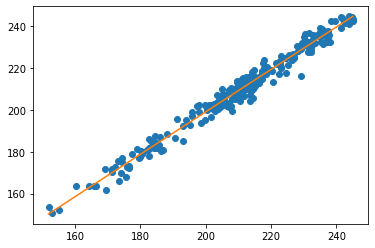

In [63]:
plt.plot(df2["Open"],df2["Adj Close"],'o')
plt.plot([min(df2["Open"]),max(df2["Open"])],[-3.15446137+1.01078752 *min(df2["Open"]),-3.15446137+1.01078752*max(df2["Open"])])

## FORECASTING

In [70]:
a = {'Open(x)':df2["Open"],'Adj Close(y)':df2["Adj Close"]}
b = pd.DataFrame(a)
b

,Open(x),Adj Close(y)
0,153.000000,150.579803
1,151.860001,153.698120
2,155.100006,152.282501
3,160.320007,163.607422
4,169.589996,161.845322
...,...,...
248,231.550003,236.479996
249,236.589996,235.240005
250,233.529999,231.850006
251,232.910004,235.770004


In [71]:
from sklearn.linear_model import LinearRegression

Linea_Regresion = LinearRegression()

Linea_Regresion.fit(b[['Open(x)']],b[['Adj Close(y)']])

print('La pendiente es : ',Linea_Regresion.coef_,'\nLa interseccion es : ',Linea_Regresion.intercept_)

La pendiente es :  [[1.01078752]] 
La interseccion es :  [-3.15446137]


y= -3.15446137+1.01078752

(0.0, 249.2885529091494)

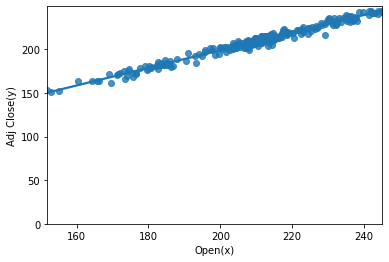

In [73]:
#ANALIZAMOS DE MANERA VISUAL

import seaborn as sns

sns.regplot( x = 'Open(x)', y = 'Adj Close(y)', data = b,ci = 95)
plt.ylim(0,)

## TIME SERIES ANALYSIS

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
df3=df.drop(columns=['High','Low','Close','Volume','Open'])
df3

,Date,Adj Close
0,2020-04-01,150.579803
1,2020-04-02,153.698120
2,2020-04-03,152.282501
3,2020-04-06,163.607422
4,2020-04-07,161.845322
...,...,...
248,2021-03-26,236.479996
249,2021-03-29,235.240005
250,2021-03-30,231.850006
251,2021-03-31,235.770004


<AxesSubplot:>

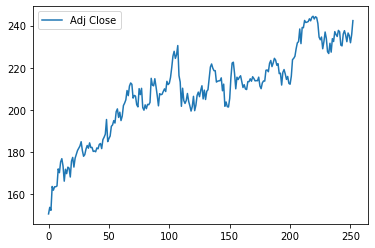

In [91]:
df3.plot()

Como vemos la grafica de los precios tiene un comportamiento ascendente por lo que esperamos un proyección que nos muestre precios crecientes

#### Coeficiente de Pearson y p-valor

Para observar el coeficiente de Pearson y el $p$-valor utilizamos la función stats de la librería scipy y dentro de ella pearsonr.

In [74]:
#1.Importamos la funcion 
from scipy import stats

#2.Mandamos a llamar la funcion pearsonr
Pearson = stats.pearsonr(b.loc[:,'Open(x)'], b.loc[:,'Adj Close(y)'])

In [75]:
#3.IMPRIMIMOS EL COEFICIENTE DE PEARSON Y EL P-VALOR
print('El coeficiente de Pearson es ',Pearson[0],'\nEl P-Valor es ',Pearson[1])

El coeficiente de Pearson es  0.9890007931075019 
El P-Valor es  2.376701829375412e-210


In [76]:
#VERIFICAMOS lo QUE NOS DICE EL P-VALOR
if 0.01 < Pearson[1] and Pearson[1] < 0.05 :
  print('Fuerte certeza de relacion lineal')
elif 0.05 < Pearson[1] and Pearson[1] < 0.1 :
  print('Moderada certeza de relacion lineal')
elif Pearson[1] < 0.1:
  print('Debil certeza de relacion lineal')
elif Pearson[1] > 0.1:
  print('No existe certeza de relacion lineal')

Debil certeza de relacion lineal


#### R^2 Coeficiente de determinación

El coeficiente de determinación nos dice lo cerca que están los datos de la línea de regresión ajustada.

|R^2|Significado|

|Valor cercano a 1|La línea de regresión es un buen ajuste a los datos|
|Valor cercano a 0|La línea de regresión no es un buen ajuste a los datos|

Sí el valor de $R^2$ es negativo puede deberse a un sobre ajuste de los datos.

Este coeficiente es aplicable a una regresión lineal, múltiple y polinómica, entre otras.

In [77]:
b
#1: IMPORTAMOS

from sklearn.linear_model import LinearRegression

LM = LinearRegression()

#2: AJUSTAMOS

LM.fit(b[['Open(x)']], b[['Adj Close(y)']])

#3: CALCULAMOS EL COEFICIENTE DE DETERMINACION

print('El coeficiente de determinacion es ',LM.score(b[['Open(x)']], b[['Adj Close(y)']]))

El coeficiente de determinacion es  0.9781225687672668


El coeficiente de determinación es la proporción de la varianza total de la variable explicada por la regresión. 
Es también denominado R cuadrado y sirve para reflejar la bondad del ajuste de un modelo a la variable 
que se pretende explicar.

El coeficiente de determinación puede adquirir resultados que oscilan entre 0 y 1. 
Así, cuando adquiere resultados más cercanos a 1, mayor resultará el ajuste del modelo a la variable que se pretende aplicar para el caso en concreto. Por el contrario, cuando adquiere resultados que se acercan al valor 0, menor será el ajuste del modelo a la variable que se pretende aplicar y, justo por eso, resultará dicho modelo menos fiable.

# Data clustering

Es util por que se tienen menos de 10000 individuos*

In [84]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

NORMALIZAMOS los datos:para que el agrupamiento no se valla parcializado a una sola variable.

In [85]:
from sklearn.preprocessing import normalize
data_a=normalize(a_df)

Aqui normalizamos los datos

In [86]:
data_a= DataFrame(data_a,columns=['x','y'])
print(a_df)

              x           y
0    153.000000  150.579803
1    151.860001  153.698120
2    155.100006  152.282501
3    160.320007  163.607422
4    169.589996  161.845322
..          ...         ...
248  231.550003  236.479996
249  236.589996  235.240005
250  233.529999  231.850006
251  232.910004  235.770004
252  238.470001  242.350006

[253 rows x 2 columns]


In [87]:
data_a=pd.DataFrame(data_a,columns=data_a.columns)
data_a.head()

,x,y
0,0.712721,0.701447
1,0.702840,0.711348
2,0.713558,0.700596
3,0.699895,0.714246
4,0.723432,0.690395
